<img src = "https://global-uploads.webflow.com/5f0d53c042a9ed6288de7f8d/5f6337ae2cfaa10946ceeb06_Hacktiv8%20logo%20horizontal%2001%20black-p-500.png" width = 400>
<h1 align=center><font size = 5>Hacktiv8 PTP Introduction to Data Science Projects 2 // Statistical Treatment for Datasets</font></h1>

Title: Hacktiv8 PTP Introduction to Data Science Projects 2: Statistical Treatment for Datasets Starter Notebook\
Last Updated: September 20, 2020\
Author: Raka Ardhi

## NYC Property Sales Introduction

The aim of this projects is to introduce you to practical statistic with Python as concrete and as consistent as possible. Using what you’ve learned; download the NYC Property Sales Dataset from Kaggle. This dataset is a record of every building or building unit (apartment, etc.) sold in the New York City property market over a 12-month period.

This dataset contains the location, address, type, sale price, and sale date of building units sold. A reference on the trickier fields:

* `BOROUGH`: A digit code for the borough the property is located in; in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).
* `BLOCK`; `LOT`: The combination of borough, block, and lot forms a unique key for property in New York City. Commonly called a BBL.
* `BUILDING CLASS AT PRESENT` and `BUILDING CLASS AT TIME OF SALE`: The type of building at various points in time.

Note that because this is a financial transaction dataset, there are some points that need to be kept in mind:

* Many sales occur with a nonsensically small dollar amount: $0 most commonly. These sales are actually transfers of deeds between parties: for example, parents transferring ownership to their home to a child after moving out for retirement.
* This dataset uses the financial definition of a building/building unit, for tax purposes. In case a single entity owns the building in question, a sale covers the value of the entire building. In case a building is owned piecemeal by its residents (a condominium), a sale refers to a single apartment (or group of apartments) owned by some individual.

Formulate a question and derive a statistical hypothesis test to answer the question. You have to demonstrate that you’re able to make decisions using data in a scientific manner. Examples of questions can be:

* Is there a difference in unit sold between property built in 1900-2000 and 2001 so on?
* Is there a difference in unit sold based on building category?
* What can you discover about New York City real estate by looking at a year's worth of raw transaction records? Can you spot trends in the market?

Please make sure that you have completed the lesson for this course, namely Python and Practical Statistics which is part of this Program.

**Note:** You can take a look at Project Rubric below:

| Code Review |  |
| :--- | :--- |
| CRITERIA | SPECIFICATIONS |
| Mean | Student implement mean to specifics column/data using pandas, numpy, or scipy|
| Median | Student implement median to specifics column/data using pandas, numpy, or scipy|
| Modus | Student implement modus to specifics column/data using pandas, numpy, or scipy|
| Central Tendencies | Implementing Central Tendencies through dataset |
| Box Plot | Implementing Box Plot to visualize spesific data |
| Z-Score | Implementing Z-score concept to specific data |
| Probability Distribution | Student analyzing distribution of data and gain insight from the distribution |
| Intervals | Implementing Confidence or Prediction Intervals |
| Hypotesis Testing | Made 1 Hypotesis and get conclusion from data |
| Preprocessing | Student preprocess dataset before applying the statistical treatment. |
| Does the code run without errors? | The code runs without errors. All code is functional and formatted properly. |

| Readability |  |
| :--- | :--- |
| CRITERIA | SPECIFICATIONS |
| Well Documented | All cell in notebook are well documented with markdown above each cell explaining the code|

| Analysis |  |
| :--- | :--- |
| CRITERIA | SPECIFICATIONS |
|Overall Analysis| Gain an insight/conclusion of overall plots that answer the hypotesis |

**Focus on "Graded-Function" sections.**

------------

## Data Preparation

Load the library you need.

Get your NYC property data from [here](https://www.kaggle.com/new-york-city/nyc-property-sales) and load the dataframe to your notebook.

In [1]:
# Get your import statement here
import math
import numpy as np
import pandas as pd
import pylab
import seaborn as sns
import statistics

from scipy import stats
from scipy.stats import norm

In [2]:
# Load your dataset here
df = pd.read_csv("dataset/nyc-rolling-sales.csv")

print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


Let's view the top 5 rows of the dataset using the `head()` function.

In [3]:
# Write your syntax here
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


We can also veiw the bottom 5 rows of the dataset using the `tail()` function.

In [4]:
# Write your syntax here
df.tail()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,,10309,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,,10309,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,,10309,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,,10309,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00
84547,8413,5,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,,P9,155 CLAY PIT ROAD,,10309,0,1,1,10796,2400,2006,4,P9,69300,2016-10-27 00:00:00


BOROUGH: A digit code for the borough the property is located in; in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).

To view the dimensions of the dataframe, we use the `.shape` parameter. Expected result: (84548, 22)

In [5]:
# Write your syntax here
df.shape

(84548, 22)

According to this official page, Ease-ment is "is a right, such as a right of way, which allows an entity to make limited use of another’s real property. For example: MTA railroad tracks that run across a portion of another property". Also, the Unnamed column is not mentioned and was likely used for iterating through records. So, those two columns are removed for now.

In [6]:
# Drop 'Unnamed: 0' and 'EASE-MENT' features using .drop function

df.drop(["Unnamed: 0", "EASE-MENT"], axis=1, inplace=True)

Let's view Dtype of each features in dataframe using `.info()` function.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         84548 non-null  int64 
 1   NEIGHBORHOOD                    84548 non-null  object
 2   BUILDING CLASS CATEGORY         84548 non-null  object
 3   TAX CLASS AT PRESENT            84548 non-null  object
 4   BLOCK                           84548 non-null  int64 
 5   LOT                             84548 non-null  int64 
 6   BUILDING CLASS AT PRESENT       84548 non-null  object
 7   ADDRESS                         84548 non-null  object
 8   APARTMENT NUMBER                84548 non-null  object
 9   ZIP CODE                        84548 non-null  int64 
 10  RESIDENTIAL UNITS               84548 non-null  int64 
 11  COMMERCIAL UNITS                84548 non-null  int64 
 12  TOTAL UNITS                     84548 non-null

It looks like empty records are not being treated as NA. We convert columns to their appropriate data types to obtain NAs.

In [8]:
#First, let's check which columns should be categorical
print('Column name')
for col in df.columns:
    if df[col].dtype=='object':
        print(col, df[col].nunique())

Column name
NEIGHBORHOOD 254
BUILDING CLASS CATEGORY 47
TAX CLASS AT PRESENT 11
BUILDING CLASS AT PRESENT 167
ADDRESS 67563
APARTMENT NUMBER 3989
LAND SQUARE FEET 6062
GROSS SQUARE FEET 5691
BUILDING CLASS AT TIME OF SALE 166
SALE PRICE 10008
SALE DATE 364


In [9]:
# LAND SQUARE FEET,GROSS SQUARE FEET, SALE PRICE, BOROUGH should be numeric. 
# SALE DATE datetime format.
# categorical: NEIGHBORHOOD, BUILDING CLASS CATEGORY, TAX CLASS AT PRESENT, BUILDING CLASS AT PRESENT,
# BUILDING CLASS AT TIME OF SALE, TAX CLASS AT TIME OF SALE,BOROUGH 

numer = ['LAND SQUARE FEET','GROSS SQUARE FEET', 'SALE PRICE', 'BOROUGH']
for col in numer: # coerce for missing values
    df[col] = pd.to_numeric(df[col], errors='coerce')

categ = ['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT', 'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE']
for col in categ:
    df[col] = df[col].astype('category')

df['SALE DATE'] = pd.to_datetime(df['SALE DATE'], errors='coerce')

Our dataset is ready for checking missing values.

In [10]:
missing = df.isnull().sum()/len(df)*100

print(pd.DataFrame([missing[missing>0],pd.Series(df.isnull().sum()[df.isnull().sum()>1000])], index=['percent missing','how many missing']))

                  LAND SQUARE FEET  GROSS SQUARE FEET   SALE PRICE
percent missing          31.049818          32.658372     17.22217
how many missing      26252.000000       27612.000000  14561.00000


Around 30% of GROSS SF and LAND SF are missing. Furthermore, around 17% of SALE PRICE is also missing.

We can fill in the missing value from one column to another, which will help us reduce missing values. Expected values:

(6, 20)

(1366, 20)

In [11]:
print(df[(df['LAND SQUARE FEET'].isnull()) & (df['GROSS SQUARE FEET'].notnull())].shape)
print(df[(df['LAND SQUARE FEET'].notnull()) & (df['GROSS SQUARE FEET'].isnull())].shape)

(6, 20)
(1366, 20)


There are 1372 rows that can be filled in with their approximate values.

In [12]:
df['LAND SQUARE FEET'] = df['LAND SQUARE FEET'].mask((df['LAND SQUARE FEET'].isnull()) & (df['GROSS SQUARE FEET'].notnull()), df['GROSS SQUARE FEET'])
df['GROSS SQUARE FEET'] = df['GROSS SQUARE FEET'].mask((df['LAND SQUARE FEET'].notnull()) & (df['GROSS SQUARE FEET'].isnull()), df['LAND SQUARE FEET'])
df["SALE PRICE"] = df["SALE PRICE"].fillna(df["SALE PRICE"].mean())

In [13]:
#  Check for duplicates before

print(sum(df.duplicated()))

df[df.duplicated(keep=False)].sort_values(['NEIGHBORHOOD', 'ADDRESS']).head(10)

# df.duplicated() automatically excludes duplicates, to keep duplicates in df we use keep=False

# in df.duplicated(df.columns) we can specify column names to look for duplicates only in those mentioned columns.

765


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
76286,5,ANNADALE,02 TWO FAMILY DWELLINGS,1,6350,7,B2,106 BENNETT PLACE,,10312,2,0,2,8000.0,4208.0,1985,1,B2,1.276456e+06,2017-06-27
76287,5,ANNADALE,02 TWO FAMILY DWELLINGS,1,6350,7,B2,106 BENNETT PLACE,,10312,2,0,2,8000.0,4208.0,1985,1,B2,1.276456e+06,2017-06-27
76322,5,ANNADALE,05 TAX CLASS 1 VACANT LAND,1B,6459,28,V0,N/A HYLAN BOULEVARD,,0,0,0,0,6667.0,6667.0,0,1,V0,1.276456e+06,2017-05-11
76323,5,ANNADALE,05 TAX CLASS 1 VACANT LAND,1B,6459,28,V0,N/A HYLAN BOULEVARD,,0,0,0,0,6667.0,6667.0,0,1,V0,1.276456e+06,2017-05-11
76383,5,ARDEN HEIGHTS,01 ONE FAMILY DWELLINGS,1,5741,93,A5,266 ILYSSA WAY,,10312,1,0,1,500.0,1354.0,1996,1,A5,3.200000e+05,2017-06-06
76384,5,ARDEN HEIGHTS,01 ONE FAMILY DWELLINGS,1,5741,93,A5,266 ILYSSA WAY,,10312,1,0,1,500.0,1354.0,1996,1,A5,3.200000e+05,2017-06-06
76643,5,ARROCHAR,02 TWO FAMILY DWELLINGS,1,3103,57,B2,129 MC CLEAN AVENUE,,10305,2,0,2,5000.0,2733.0,1925,1,B2,1.276456e+06,2017-03-21
76644,5,ARROCHAR,02 TWO FAMILY DWELLINGS,1,3103,57,B2,129 MC CLEAN AVENUE,,10305,2,0,2,5000.0,2733.0,1925,1,B2,1.276456e+06,2017-03-21
50126,4,ASTORIA,03 THREE FAMILY DWELLINGS,1,856,139,C0,22-18 27TH STREET,,11105,3,0,3,2000.0,1400.0,1930,1,C0,1.276456e+06,2017-01-12
50127,4,ASTORIA,03 THREE FAMILY DWELLINGS,1,856,139,C0,22-18 27TH STREET,,11105,3,0,3,2000.0,1400.0,1930,1,C0,1.276456e+06,2017-01-12


The dataframe has 765 duplicated rows (exluding the original rows).

In [14]:
df.drop_duplicates(inplace=True)

print(sum(df.duplicated()))

0


## Exploratory data analysis

Now, let's get a simple descriptive statistics with `.describe()` function for `COMMERCIAL UNITS` features.

In [15]:
df[df['COMMERCIAL UNITS']==0].describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,78777.000000,78777.000000,78777.000000,78777.000000,78777.000000,78777.0,78777.000000,5.278000e+04,5.278000e+04,78777.000000,7.877700e+04
mean,3.004329,4273.781015,395.422420,10722.737068,1.691737,0.0,1.724133,3.140140e+03,2.714612e+03,1781.065451,1.042223e+06
std,1.298594,3589.241940,671.604654,1318.493961,9.838994,0.0,9.835016,2.929999e+04,2.791294e+04,551.024570,3.040568e+06
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,2.000000,1330.000000,23.000000,10304.000000,0.000000,0.0,1.000000,1.600000e+03,9.750000e+02,1920.000000,3.012000e+05
50%,3.000000,3340.000000,52.000000,11209.000000,1.000000,0.0,1.000000,2.295000e+03,1.600000e+03,1940.000000,6.530000e+05
75%,4.000000,6361.000000,1003.000000,11357.000000,2.000000,0.0,2.000000,3.300000e+03,2.388000e+03,1967.000000,1.276456e+06
max,5.000000,16322.000000,9106.000000,11694.000000,889.000000,0.0,889.000000,4.252327e+06,4.252327e+06,2017.000000,3.450000e+08


Let us try to understand the columns. Above table shows descriptive statistics for the numeric columns.

- There are zipcodes with 0 value
- Can block/lot numbers go up to 16322?
- Most of the properties have 2 unit and maximum of 1844 units? The latter might mean some company purchased a building. This should be treated as an outlier.
- Other columns also have outliers which needs further investigation.
- Year column has a year with 0
- Most sales prices less than 10000 can be treated as gift or transfer fees.

Now, let's get a simple descriptive statistics with `.describe()` function for `RESIDENTIAL UNITS` features.

Function below are graded function. (1 Points)

In [16]:
# Write your function below

# Graded-Funtion Begin (~1 Lines)
df[df["RESIDENTIAL UNITS"]==1].describe()

# Graded-Funtion End

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,34465.00000,34465.000000,34465.000000,34465.000000,34465.0,34465.000000,34465.000000,23459.000000,23459.000000,34465.000000,3.446500e+04
mean,3.13756,4496.829218,674.662701,10810.332279,1.0,0.018105,1.017757,2594.566009,1270.662049,1766.103844,1.148822e+06
std,1.37610,3799.120589,803.144712,655.811941,0.0,0.162200,0.160440,2573.940307,1390.789514,586.571615,2.212971e+06
min,1.00000,1.000000,1.000000,0.000000,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,2.00000,1226.000000,39.000000,10304.000000,1.0,0.000000,1.000000,1280.000000,840.000000,1920.000000,4.200000e+05
50%,3.00000,3733.000000,200.000000,11205.000000,1.0,0.000000,1.000000,2300.000000,1272.000000,1950.000000,7.500000e+05
75%,4.00000,6819.000000,1132.000000,11358.000000,1.0,0.000000,1.000000,3917.000000,1654.000000,1990.000000,1.276456e+06
max,5.00000,16322.000000,9106.000000,11694.000000,1.0,6.000000,7.000000,102862.000000,82000.000000,2016.000000,9.852570e+07


Write your findings below:

Some features has zero value

Use `.value_counts` function to count total value of `BOROUGH` features. Expected value:

4    26548\
3    23843\
1    18102\
5     8296\
2     6994\
Name: BOROUGH, dtype: int64

In [17]:
# Write your syntax below
df["BOROUGH"].value_counts()

4    26548
3    23843
1    18102
5     8296
2     6994
Name: BOROUGH, dtype: int64

From here, we can calculate the mean for each Borough. Use `.mean()` function to calculate mean.

Function below are graded function. (1 Points)

In [18]:
# Write your function below

# Graded-Funtion Begin (~1 Lines)
df.drop(["BLOCK", "LOT", "ZIP CODE"], axis=1).groupby("BOROUGH", as_index=False).mean()

# Graded-Funtion End

,BOROUGH,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
0,1,2.276931,0.280521,2.597227,5646.945628,32622.997758,1706.536902,2.918711e+06
1,2,3.343580,0.160280,3.510152,3909.012725,4489.147412,1750.578067,5.946771e+05
2,3,2.011618,0.145451,2.194229,2016.057333,2481.756365,1767.130185,8.410834e+05
3,4,1.687283,0.190410,1.908920,4265.245190,3345.841693,1852.259982,9.036701e+05
4,5,1.230111,0.080400,1.313163,8339.843259,4709.373037,1869.968177,7.476701e+05


From here, we can calculate the median for each Borough. Use `.median()` function to calculate median.

Function below are graded function. (1 Points)

In [19]:
# Write your function below

# Graded-Funtion Begin (~1 Lines)
df.drop(["BLOCK", "LOT", "ZIP CODE"], axis=1).groupby("BOROUGH", as_index=False).median()

# Graded-Funtion End

,BOROUGH,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
0,1,0,0,1,2498.0,7520.0,1937,1.276456e+06
1,2,1,0,1,2375.0,1764.0,1932,2.748970e+05
2,3,1,0,1,1800.0,1520.0,1930,4.256050e+05
3,4,1,0,1,2768.0,1728.0,1945,7.400000e+05
4,5,1,0,1,3700.0,1632.0,1973,5.600000e+05


From here, we can calculate the mode for each Borough.

Function below are graded function. (1 Points)

In [20]:
# Write your function below

# Graded-Funtion Begin (~1 Lines)
df.drop(["BLOCK", "LOT", "ZIP CODE"], axis=1).groupby("BOROUGH").agg(lambda x: stats.mode(x)[0][0]).reset_index()

# Graded-Funtion End

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,UPPER EAST SIDE (59-79),13 CONDOS - ELEVATOR APARTMENTS,2,R4,169 WEST 95TH STREET,,0,0,1,2523.0,112850.0,0,2,R4,1.276456e+06,2017-08-07
1,2,RIVERDALE,02 TWO FAMILY DWELLINGS,1,D4,2287 JOHNSON AVENUE,,1,0,1,0.0,0.0,0,1,D4,0.000000e+00,2017-06-29
2,3,BEDFORD STUYVESANT,02 TWO FAMILY DWELLINGS,1,R4,429 KENT AVENUE,,1,0,1,0.0,0.0,0,1,R4,0.000000e+00,2016-10-06
3,4,FLUSHING-NORTH,01 ONE FAMILY DWELLINGS,1,A1,131-05 40TH ROAD,,1,0,1,4000.0,2000.0,1920,1,A1,1.276456e+06,2016-11-10
4,5,GREAT KILLS,01 ONE FAMILY DWELLINGS,1,A5,1235 FOREST HILL ROAD,,1,0,1,4000.0,1200.0,1970,1,A5,1.276456e+06,2017-03-01


From here, we can calculate the Range for each Borough.

Function below are graded function. (1 Points)

In [21]:
# Write your function below

# Graded-Funtion Begin (~1 Lines)
for borough in [1, 2, 3, 4, 5]:
  years = df[df["BOROUGH"] == borough]["YEAR BUILT"]
  years = years.replace(to_replace=0, value=years.median())
  print(f"The range of YEAR BUILT in borough {borough} is {years.max() - years.min()}")

# Graded-Funtion End

The range of YEAR BUILT in borough 1 is 906
The range of YEAR BUILT in borough 2 is 217
The range of YEAR BUILT in borough 3 is 217
The range of YEAR BUILT in borough 4 is 147
The range of YEAR BUILT in borough 5 is 336


From here, we can calculate the Variance for each Borough.

Function below are graded function. (1 Points)

In [22]:
# Write your function below

# Graded-Funtion Begin (~1 Lines)
for borough in df["BOROUGH"].unique():
  sale_prices_series = df[df["BOROUGH"] == borough]["SALE PRICE"] 
  sale_prices = sale_prices_series

  var_stat = statistics.variance(sale_prices)
  var_scipy = stats.tvar(sale_prices)
  var_np = np.var(sale_prices, ddof=1)
  var_series = sale_prices_series.var(ddof=1)

  print(f"Sale price variance for borough {borough} is :")
  print(f"{var_stat} (statistics)")
  print(f"{var_scipy} (scipy)")
  print(f"{var_np} (np)")
  print(f"{var_series} (series var)")
  print("\n")

# Graded-Funtion End

Sale price variance for borough 1 is :
463439159187504.75 (statistics)
463439159187504.6 (scipy)
463439159187493.56 (np)
463439159187493.56 (series var)


Sale price variance for borough 2 is :
7803692804476.896 (statistics)
7803692804476.8955 (scipy)
7803692804477.106 (np)
7803692804477.106 (series var)


Sale price variance for borough 3 is :
15617607153085.248 (statistics)
15617607153085.252 (scipy)
15617607153086.766 (np)
15617607153086.766 (series var)


Sale price variance for borough 4 is :
7284569309173.814 (statistics)
7284569309173.813 (scipy)
7284569309175.105 (np)
7284569309175.105 (series var)


Sale price variance for borough 5 is :
2727823942278.5703 (statistics)
2727823942278.5713 (scipy)
2727823942278.1846 (np)
2727823942278.1846 (series var)




From here, we can calculate the SD for each Borough.

Function below are graded function. (1 Points)

In [23]:
# Write your function below

# Graded-Funtion Begin (~1 Lines)
for borough in df["BOROUGH"].unique():
  sale_prices_series = df[df["BOROUGH"] == borough]["SALE PRICE"] 
  sale_prices = list(sale_prices_series)

  std_pandas = sale_prices_series.std()
  std_np = np.std(sale_prices, ddof=1)
  std_series = sale_prices_series.std(ddof=1)
  std_stat = statistics.stdev(sale_prices)

  print(f"Sale price Standard Deviation for borough {borough} is :")
  print(f"{std_pandas} (pandas)")
  print(f"{std_np} (np)")
  print(f"{std_series} (series std)")
  print(f"{std_stat} (statistics)")
  print("\n")


# Graded-Funtion End

Sale price Standard Deviation for borough 1 is :
21527637.101816203 (pandas)
21527637.10181646 (np)
21527637.101816203 (series std)
21527637.101816464 (statistics)


Sale price Standard Deviation for borough 2 is :
2793509.0485762 (pandas)
2793509.048576162 (np)
2793509.0485762 (series std)
2793509.0485761627 (statistics)


Sale price Standard Deviation for borough 3 is :
3951911.835186454 (pandas)
3951911.835186262 (np)
3951911.835186454 (series std)
3951911.8351862617 (statistics)


Sale price Standard Deviation for borough 4 is :
2698994.129147951 (pandas)
2698994.1291477117 (np)
2698994.129147951 (series std)
2698994.1291477117 (statistics)


Sale price Standard Deviation for borough 5 is :
1651612.527888483 (pandas)
1651612.5278886 (np)
1651612.527888483 (series std)
1651612.5278885996 (statistics)




Now we can analyze Probability Distibution below.

Function below are graded function. (1 Points)

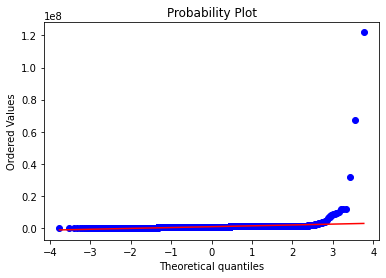

In [24]:
# Write your function below

# Graded-Funtion Begin
sale_prices = list(df[df["BOROUGH"] == borough]["SALE PRICE"])

stats.probplot(sale_prices, dist='norm', plot=pylab)
pylab.show()

# Graded-Funtion End

This is the plot of normal distribution for SALE PRICE. From the plot we can see that the distribution is left skewed because it has long left tail.


Now we can analyze Confidence Intervals below.

Function below are graded function. (1 Points)

In [25]:
# Write your function below

# Graded-Funtion Begin
mean_sd_size = df.groupby("BOROUGH").agg({"YEAR BUILT": [np.mean, np.std, np.size]})

for index, row in mean_sd_size.iterrows():
  mean = row["YEAR BUILT"]["mean"]
  sd = row["YEAR BUILT"]["std"]
  size = row["YEAR BUILT"]["size"]
  z = 1.96

  se = sd / np.sqrt(size)

  lcb = mean - z * se
  ucb = mean + z * se
  print(f"I am 95% sure that most properties in borough {index} were built around year {int(math.floor(lcb))} until {int(math.floor(ucb))}.")

# Graded-Funtion End

I am 95% sure that most properties in borough 1 were built around year 1697 until 1715.
I am 95% sure that most properties in borough 2 were built around year 1736 until 1764.
I am 95% sure that most properties in borough 3 were built around year 1760 until 1774.
I am 95% sure that most properties in borough 4 were built around year 1847 until 1857.
I am 95% sure that most properties in borough 5 were built around year 1860 until 1879.


Make your Hypothesis Testing below

Function below are graded function. (1 Points)

In [26]:
# Write your function below

# Graded-Funtion Begin
df['LAND SQUARE FEET']=df['LAND SQUARE FEET'].replace(np.NaN,df['LAND SQUARE FEET'].median())
year_built = df["LAND SQUARE FEET"].array
df['SALE PRICE']=df['SALE PRICE'].replace(0,df['SALE PRICE'].median())
sale_price = df["SALE PRICE"].array

stat, p_value = stats.pearsonr(year_built, sale_price)
print("p-value:", p_value)

# Graded-Funtion End

p-value: 2.910008509610682e-52


Write your final conclusion below.

Your conclusion below are graded. (1 Points)
<br><br>
H0 : The smaller land square feet of the house result in the lower property price<br><br>
H1 : The smaller land square feet of the house not result in the lower house price<br><br>
Conclusion : As the p-value is shown from the Pearson Correlation test, the p-value is way less than significance level of 0.05. Therefore, we shall reject null hypothesis based on the p-value.